Final Project: | input: video naruto - > output: text | Algorithm using convolutional neural networks.

Made By: Shangmin Chen, Kelvin Yeung

In [6]:
# installing imports
!pip install opencv-python
!pip install tensorflow

# import image process
import os
import cv2

# tensorflow
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
# dataset
from sklearn.model_selection import train_test_split

In [7]:
# we want to use google drive here because we need to import the frames into a drive directory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# ESTABLISHING CONSTANT KEY VARIABLES
# https://keras.io/api/layers/recurrent_layers/time_distributed/
# variables established according to above link ^
IMAGE_LENGTH, IMAGE_WIDTH = 128, 128
TIMESKIPS = 30
CLASSES = ['shadow_clone', 'chidori', 'bathroom_that_way', 'merry_christmas']

Step 1: extract_frames() helper function - extract the frames from the video.

In [43]:
def extract_frames(video_path, time_skips=30):
    """
    Extracts frames from ith video file.
    Params:
      video_path: Path to the ith video file.
      time_skips: How many skips do we want, the amount of frames we want.
    Return:
      frame_list: A list of frames in ith video

    """
    # https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html
    # https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html

    frames_list = [] # list that will contain the frames
    vid_cap = cv2.VideoCapture(video_path) # video capture object for the ith video

    # CAP_PROP_FRAME_COUNT: Number of frames in the video file.
    vid_cap_count = int(vid_cap.get(cv2.CAP_PROP_FRAME_COUNT)) # getting the count of frames
    skips = vid_cap_count/time_skips # the amount of skips we require for the time_skips amount of skips
    print("Extracting frames...")
    for i in range(time_skips):
      # CAP_PROP_POS_FRAMES: 0-based index of the frame to be decoded/captured next.

      vid_cap.set(cv2.CAP_PROP_POS_FRAMES, i * skips)

      # cv.VideoCapture.read(	[, image]	) ->	retval, image

      retval, image = vid_cap.read()

      resized_image = cv2.resize(image, (IMAGE_LENGTH, IMAGE_WIDTH)) / 255 # https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a#:~:text=As%20the%20pixel%20values%20range,range%20from%200%20to%201.
      # divide 255 so each pixel is normalized and not a big number and falls between 0 and 1

      frames_list.append(resized_image)

    vid_cap.release()
    print("Done extracting frames.")
    return frames_list


In [55]:
import matplotlib.pyplot as plt
def extract_frames_test(video_path, time_skips=10):
    """
    Extracts frames from ith video file.
    Params:
      video_path: Path to the ith video file.
      time_skips: How many skips do we want, the amount of frames we want.
    Return:
      void.

    """
    # https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html
    # https://docs.opencv.org/3.4/d4/d15/group__videoio__flags__base.html

    frames_list = [] # list that will contain the frames
    vid_cap = cv2.VideoCapture(video_path) # video capture object for the ith video

    # CAP_PROP_FRAME_COUNT: Number of frames in the video file.
    vid_cap_count = int(vid_cap.get(cv2.CAP_PROP_FRAME_COUNT)) # getting the count of frames
    skips = vid_cap_count/time_skips # the amount of skips we require for the time_skips amount of skips
    print("Test extracting frames...")
    for i in range(time_skips):
      # CAP_PROP_POS_FRAMES: 0-based index of the frame to be decoded/captured next.

      vid_cap.set(cv2.CAP_PROP_POS_FRAMES, i * skips)

      # cv.VideoCapture.read(	[, image]	) ->	retval, image

      retval, image = vid_cap.read()

      resized_image = cv2.resize(image, (IMAGE_LENGTH, IMAGE_WIDTH))

      plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
      plt.title(f"Frame {i+1}")
      plt.show()

    vid_cap.release()
    print("Test extracting frames.")


Test extracting frames...


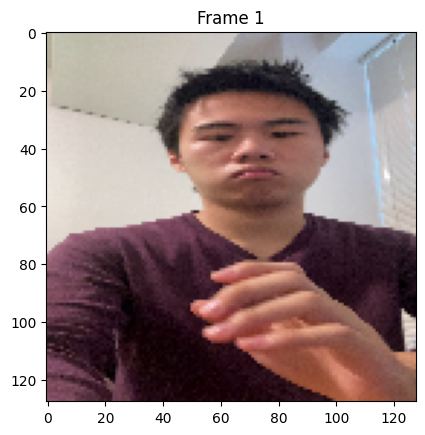

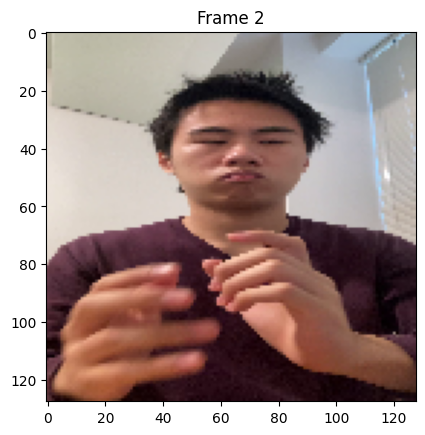

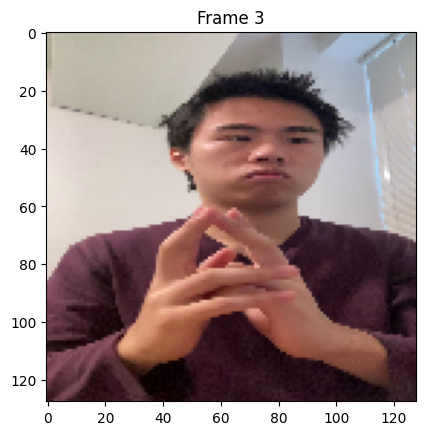

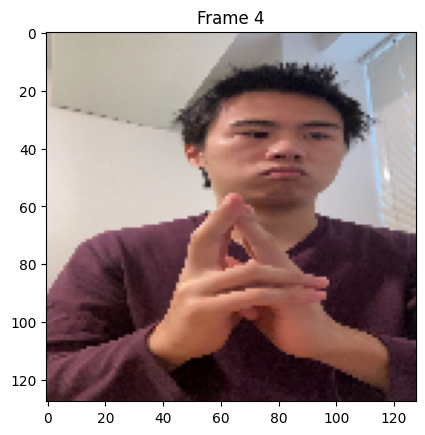

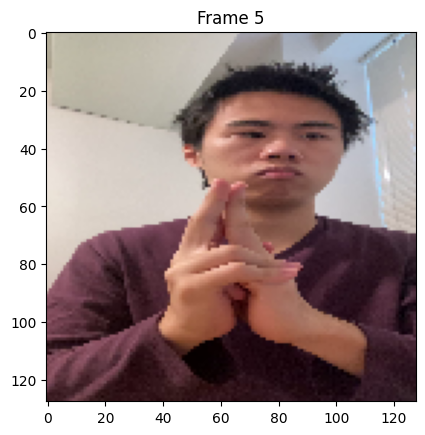

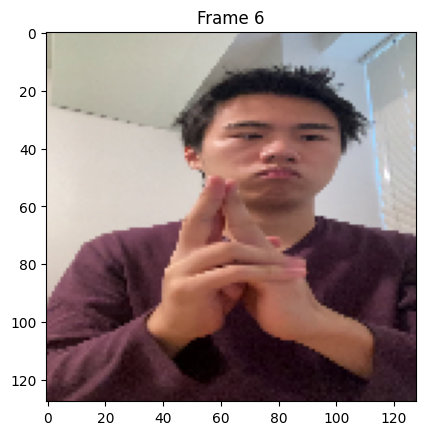

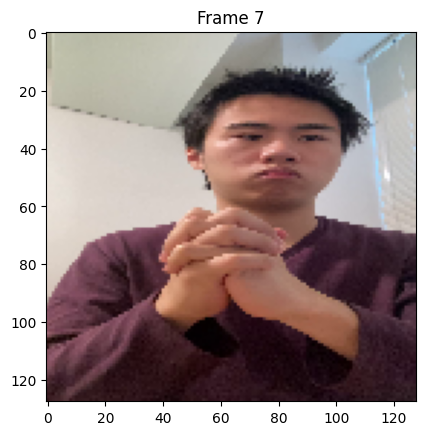

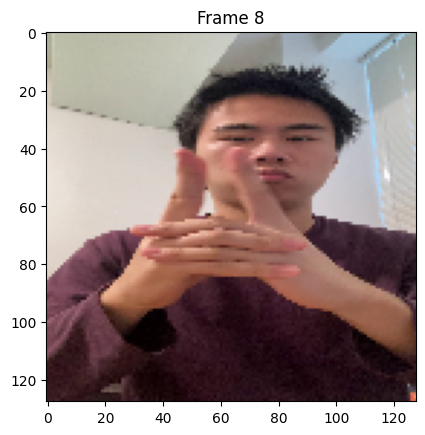

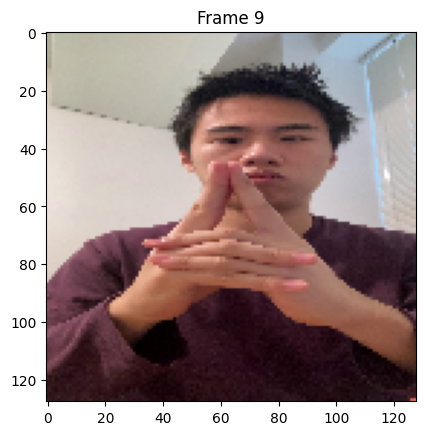

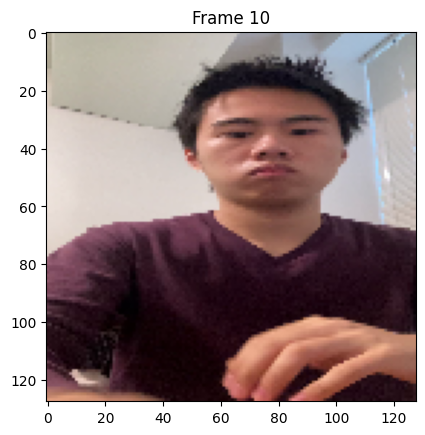

Test extracting frames.


In [6]:
# test
test_frames = extract_frames_test('/content/drive/MyDrive/FinalProj/test.MOV')

Step 2: make our dataset

In [44]:
import numpy as np
def generate_dataset(classes):
    """
    Generate dataset necessary for training.
    Param:
      classes: list of all the classes.
    Returns:
      frames_list: list of all the frames.
      labels: list of labels corresponding to frames_list
    """
    frames_list = []
    labels = []

    for iclass in range(len(classes)):
      # listdir to iterate
      videos = os.listdir(os.path.join('/content/drive/MyDrive/FinalProj/', classes[iclass]))
      # amount of videos in that class will get labeled.
      # labels += [iclass]*len(videos)
      # max to speed up preprocessing
      labels += [iclass]*30
      max = 0
      print("EXTRACTING FOR", classes[iclass])
      for video in videos:
        if max == 30:
          break
        max += 1
        path = os.path.join('/content/drive/MyDrive/FinalProj/', classes[iclass], video)
        frames_list.append(extract_frames(path))


    # list to numpy arrays to converted to dataset
    frames_list = np.asarray(frames_list)
    labels = np.array(labels)

    return frames_list, labels

In [45]:
frames_list, labels = generate_dataset(CLASSES)

EXTRACTING FOR shadow_clone
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done extracting frames.
Extracting frames...
Done e

In [46]:
one_hot_encoded_labels = to_categorical(labels, num_classes=4)

In [47]:
frames_train, frames_test, labels_train, labels_test = train_test_split(frames_list, one_hot_encoded_labels)

Now we implement the LRCN (Long-term recurrent convolution network) network model. Was going to use ConvLSTM2D layer but ended up finding the LRCN much more suitable for the task (TimeDistributed layer).

In [48]:
def LRCN_model():
  model = Sequential()

  model.add(TimeDistributed(Conv2D(16, (3,3), padding='same', activation='relu'), input_shape=(TIMESKIPS, IMAGE_LENGTH, IMAGE_WIDTH, 3)))

  model.add(TimeDistributed(MaxPooling2D(2,2))) # https://keras.io/api/layers/pooling_layers/max_pooling2d/
  model.add(TimeDistributed(Dropout(0.5))) # suggest to dropout between 0.5 - 0.8 https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/#:~:text=and%20recurrent%20connections.-,Dropout%20Rate,rate%2C%20such%20as%20of%200.8.

  model.add(TimeDistributed(Conv2D(32, (3,3), padding='same', activation='relu'))) # Hierarchical Feature Learning

  model.add(TimeDistributed(MaxPooling2D(2,2)))
  model.add(TimeDistributed(Dropout(0.5)))

  model.add(TimeDistributed(Conv2D(64, (3,3), padding='same', activation='relu'))) # Hierarchical Feature Learning

  model.add(TimeDistributed(MaxPooling2D(2,2)))
  model.add(TimeDistributed(Dropout(0.5)))

  model.add(TimeDistributed(Conv2D(128, (3,3), padding='same', activation='relu'))) # Hierarchical Feature Learning

  model.add(TimeDistributed(MaxPooling2D(2,2)))
  model.add(TimeDistributed(Dropout(0.5)))

  model.add(TimeDistributed(Flatten()))

  model.add(LSTM(32)) # from keras.layers

  model.add(Dense(4, activation = 'softmax')) # number of classes, softmax for probability

  model.summary()
  return model

In [49]:
print("Creating model")
LRCN_model = LRCN_model()
print("Model Created")

Creating model
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_26 (TimeDi  (None, 30, 128, 128, 16)  448      
 stributed)                                                      
                                                                 
 time_distributed_27 (TimeDi  (None, 30, 64, 64, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_28 (TimeDi  (None, 30, 64, 64, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_29 (TimeDi  (None, 30, 64, 64, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_30 (TimeDi  (None, 30

In [51]:
# TODO compile and fit the model

# from  train the model section
batch_size = 32
epochs = 30

LRCN_model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

training_history = LRCN_model.fit(frames_train, labels_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = LRCN_model.evaluate(frames_test, labels_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/30
3/3 [==============================] - 102s 31s/step - loss: 1.3416 - accuracy: 0.4691 - val_loss: 1.3523 - val_accuracy: 0.4444
Epoch 2/30
3/3 [==============================] - 70s 21s/step - loss: 1.3529 - accuracy: 0.3333 - val_loss: 1.3017 - val_accuracy: 0.6667
Epoch 3/30
3/3 [==============================] - 68s 21s/step - loss: 1.2747 - accuracy: 0.3210 - val_loss: 1.2636 - val_accuracy: 0.5556
Epoch 4/30
3/3 [==============================] - 73s 24s/step - loss: 1.1475 - accuracy: 0.6173 - val_loss: 1.1938 - val_accuracy: 0.5556
Epoch 5/30
3/3 [==============================] - 68s 22s/step - loss: 1.0861 - accuracy: 0.6296 - val_loss: 1.1640 - val_accuracy: 0.6667
Epoch 6/30
3/3 [==============================] - 66s 21s/step - loss: 1.1006 - accuracy: 0.6173 - val_loss: 1.1253 - val_accuracy: 0.6667
Epoch 7/30
3/3 [==============================] - 68s 20s/step - loss: 1.0474 - accuracy: 0.7778 - val_loss: 1.0511 - val_accuracy: 0.7778
Epoch 8/30
3/3 [==========

In [76]:
def graph(training_history, name1, name2, graph_name):
    '''
    Graph the model history.
    Args:
        training_history: A model history object with values
        name1: measurement 1
        name2: measurement 2
        graph_name: Graph title.
    '''

    name1val = training_history.history[name1]
    name2val = training_history.history[name2]

    epochs = range(len(name1val))

    plt.plot(epochs, name1val, 'blue', label = name1)
    plt.plot(epochs, name2val, 'red', label = name2)
    plt.xlabel('epoch')
    plt.title(str(graph_name))

    plt.legend()

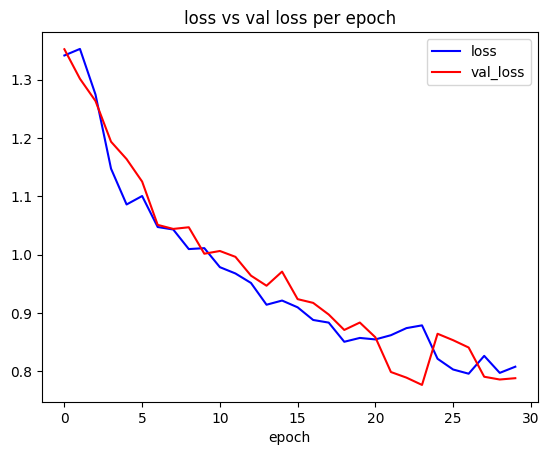

In [77]:
graph(training_history, 'loss', 'val_loss', 'loss vs val loss per epoch')

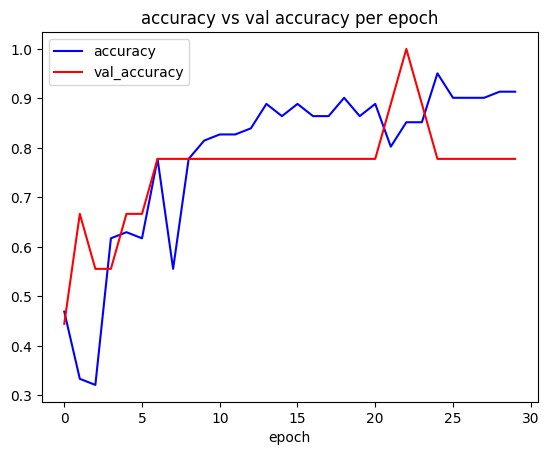

In [78]:
graph(training_history, 'accuracy', 'val_accuracy', 'accuracy vs val accuracy per epoch')

In [81]:
!pip install numpy scikit-learn matplotlib seaborn

1/1 [==============================] - 6s 6s/step


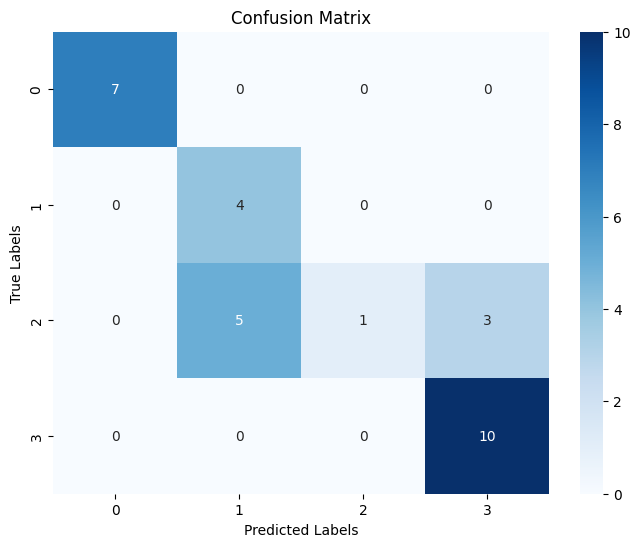

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
prediction = LRCN_model.predict(frames_test)
prediction = np.argmax(prediction, axis=1)

# Make into the same size array, 3d -> 2d array
test = []
for i in labels_test:
  for j in range(len(i)):
    if i[j] == 1:
      test.append(j)
      break

# make confusino matrix
conf_matr = confusion_matrix(test, prediction)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()